In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random

from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid


import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import animation
import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_keiko as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

Could not import rpy package
Could not import r-package RCIT


In [3]:
def crosscorr(datax, datay, lag=1):   
    return(stats.pearsonr(datax[lag:], datay[:-lag]))

In [4]:
step = 1
train_start = np.arange(1948,1977,step)
#train_end = np.arange(1955,2006,step)
validation_end = np.arange(1982,2011,step)

In [4]:
def map_builder(train_start):
    level = 0.05
    validation_end = train_start + 35
    temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    result = sst.get_data()
    lon_list = sst.get_lon_list()
    lat_list = sst.get_lat_list()
    lon = sst.get_lon()
    lat = sst.get_lat()
    
    nino = ff.timeseries_enso('nino.npy', start_year = train_start , end_year=validation_end, base_year = 1948)
    nino  = np.array(nino[11:])
    
    
    d = []
    for i in np.arange(5, 421, 12):
        d.append(i-2)
        d.append(i-1)
        d.append(i)

    d = np.array(d)

    nino_temp = nino[d]
    result_temp = result[d,:]

    corr = []
    for j in range(result_temp.shape[1]):
        #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
        r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,12)
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan

    #MAM_NINO_12 = deg.copy()
    

    return(deg[49:75,125:160])
    


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()


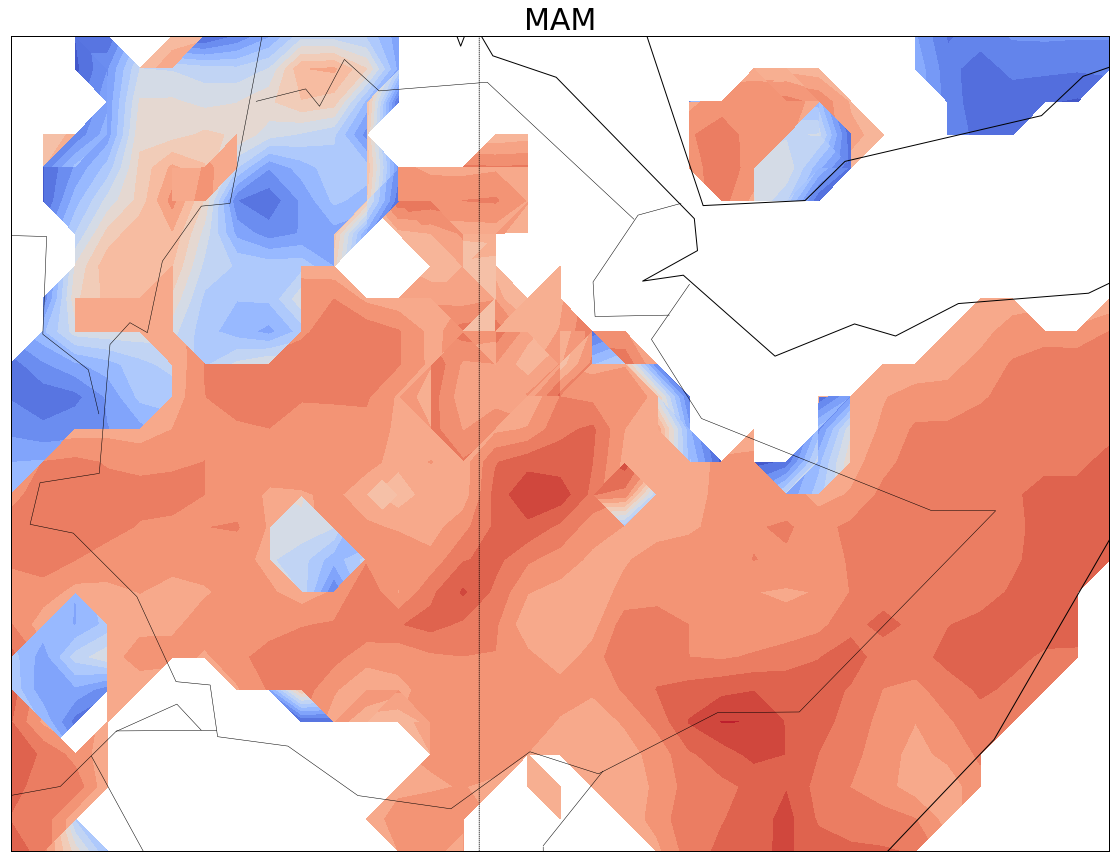

In [183]:
lon1 = np.arange(-29.75,60,0.5)

lat_t = lat[49:75]
lon1_t = lon1[125:160]

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_t.min(), \
  urcrnrlon=lon1_t.max(),llcrnrlat=lat_t.min(),urcrnrlat=lat_t.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon1_t,lat_t)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()

def animate(i):

    deg = map_builder(i)
    plt.title("MAM", fontsize = 30)
    cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
    return(cs) 


anim = animation.FuncAnimation(fig, animate,frames=np.arange(1950,1981), interval=500)

anim.save('ET_MAM_12.mp4')

In [ ]:
fig = plt.figure(figsize=(30,15))
plt.title("Degree", fontsize=16)
map = Basemap(projection='cyl',
              llcrnrlon=lon[0], 
              llcrnrlat=lat[0], 
              urcrnrlon=lon[-1], 
              urcrnrlat=lat[-1])

map.drawmapboundary()
map.drawcoastlines(linewidth=2)
map.drawcountries(linewidth=2)

#x = linspace(0, lon[-1]+1, deg.shape[1])
#y = linspace(0, lat[-1]+1, deg.shape[0])

xx, yy = meshgrid(lon, lat)
def animate(i):

    G, c = nb.graph_builder_limit(m, 0.05*i)
    deg = map_biulder(G,mask)
    
    cs = map.pcolormesh(xx, yy, deg, cmap=plt.cm.Spectral_r)
    #cs = map.contourf(xx, yy, deg, 11, cmap=plt.cm.Spectral_r)
    #cbar = plt.colorbar(cs, orientation='horizontal', shrink=0.5)
    #cbar.set_label('Degree')
    return cs 
#plt.savefig('degree-centrality .eps')
anim = animation.FuncAnimation(fig, animate,frames=20, interval=500)
anim.save('degree_deseasonal.mp4')

In [182]:
level = 0.05
train_start = 1950
validation_end = 1985

temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [166]:
nino = ff.timeseries_enso('nino.npy', start_year = train_start , end_year=validation_end, base_year = 1948)
nino  = np.array(nino[11:])

In [167]:
d = []
for i in np.arange(5, 421, 12):
    d.append(i-2)
    d.append(i-1)
    d.append(i)

d = np.array(d)

In [168]:
nino_temp = nino[d]
result_temp = result[d,:]

In [169]:
corr = []
for j in range(result_temp.shape[1]):
    #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,12)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [170]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [171]:
#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,60,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

MAM_NINO_12 = deg.copy()

In [172]:
lat_t = lat[49:75]

In [173]:
lon1_t = lon1[125:160]

In [174]:
deg_t = deg[49:75,125:160]

In [ ]:
lon  = lon1 #This must be run

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


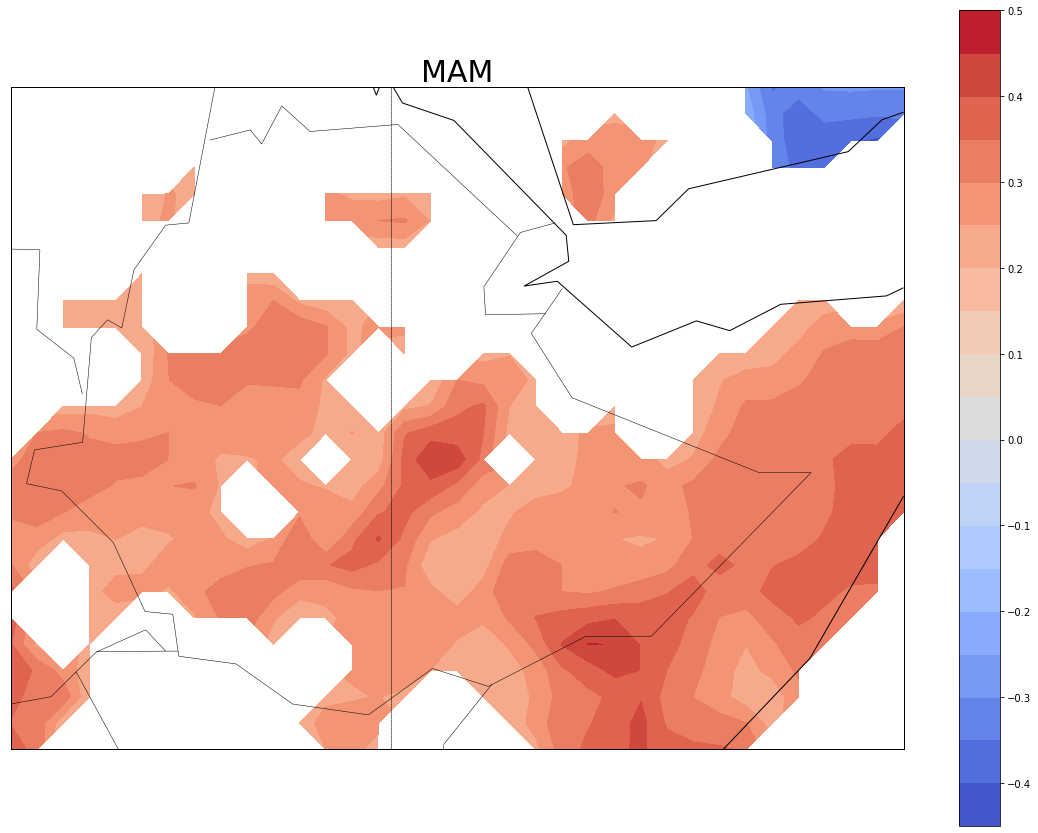

In [175]:

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_t.min(), \
  urcrnrlon=lon1_t.max(),llcrnrlat=lat_t.min(),urcrnrlat=lat_t.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon1_t,lat_t)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg_t,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


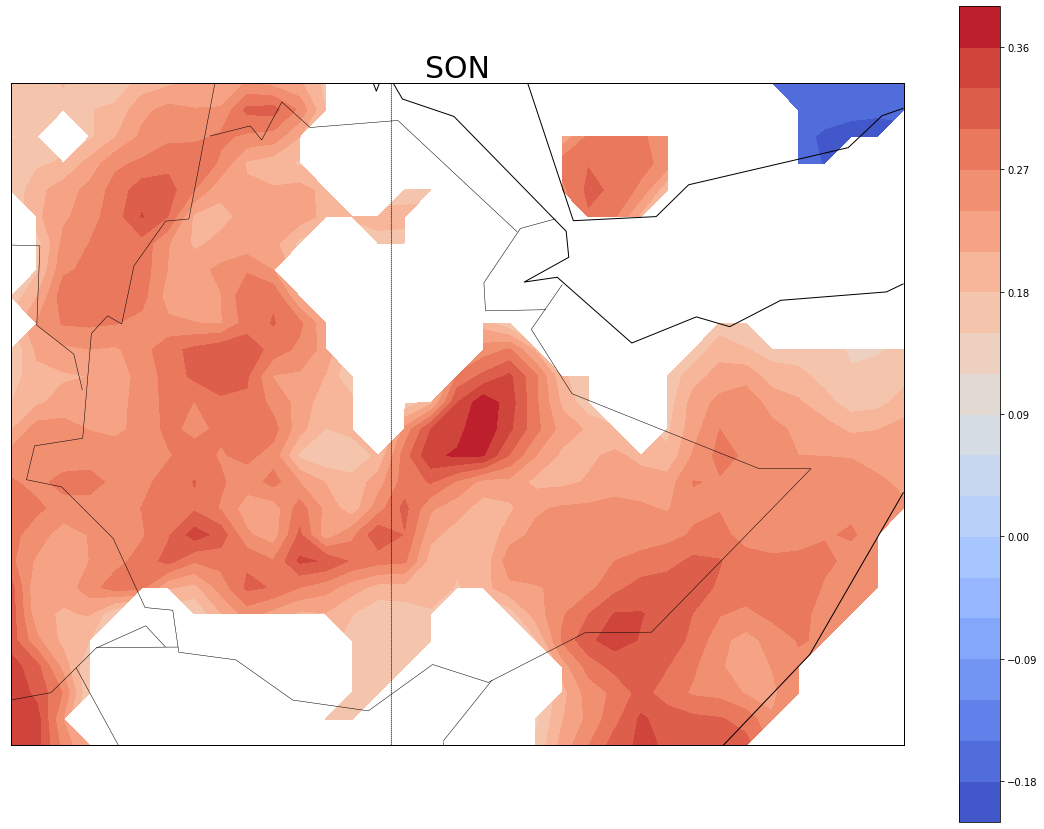

In [138]:

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1_t.min(), \
  urcrnrlon=lon1_t.max(),llcrnrlat=lat_t.min(),urcrnrlat=lat_t.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon1_t,lat_t)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg_t,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

# ET SPI

In [46]:
lat_list = np.load("ET_lat_list.npy")
lon_list = np.load("ET_lon_list.npy")

In [47]:
train_start = 1950
validation_end = 2010
level = 0.05
tau = 12

In [48]:
result = ff.timeseries_enso("ET_gamma_18912015_12.npy", start_year = train_start, end_year=validation_end, base_year = 1922)

In [49]:
nino = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
#nino  = np.array(nino[11:])

In [120]:
d = []
for i in np.arange(8, 781, 12):
    d.append(i-2)
    d.append(i-1)
    d.append(i)

d = np.array(d)

In [50]:
nino_temp = nino
result_temp = result

corr = []
for j in range(result_temp.shape[1]):
    #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [51]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [52]:
#lat = list(set(lat_list))
#lon = list(set(lon_list))

#lat.sort()
#lon.sort()

#lat = np.array(lat)
#lon = np.array(lon)

lon = np.arange(32.75,50.25,0.5)
lat = np.arange(15.25,2.25,-0.5)

In [53]:
deg = np.zeros((len(lat),len(lon)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values
        else:
            deg[i,j]=np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if sys.path[0] == '':


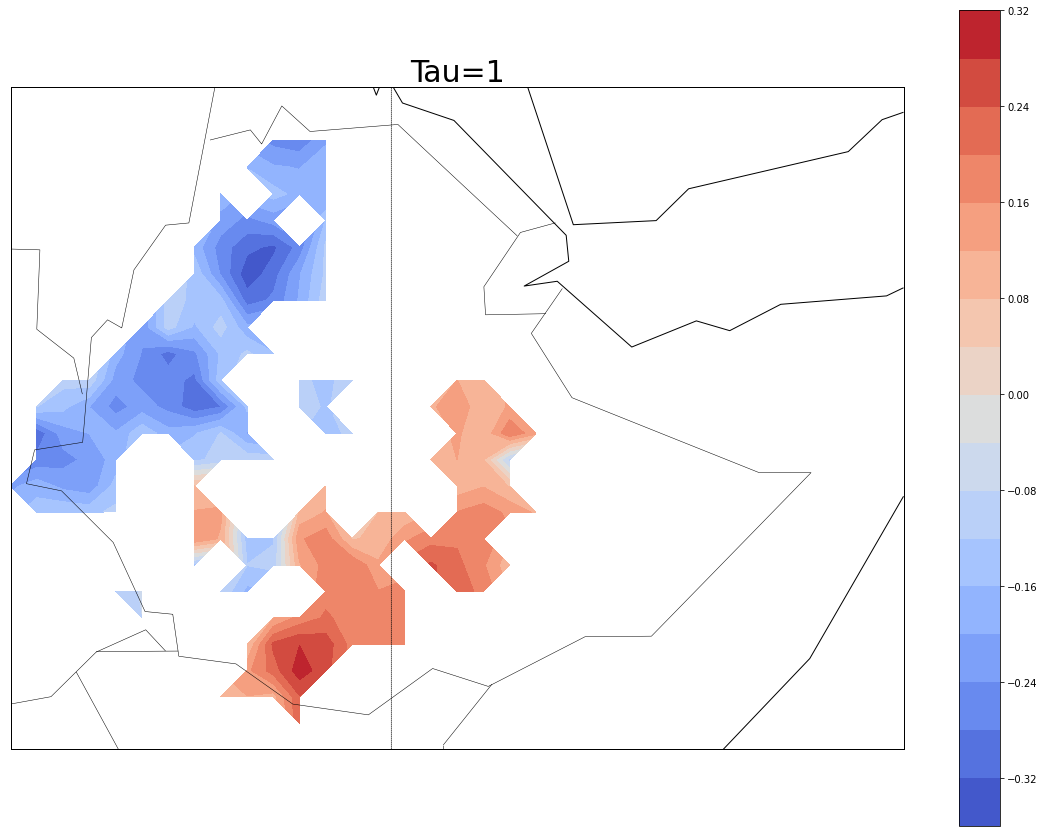

In [19]:

m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau={}".format(tau), fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
plt.savefig("ET_SPI_{}_{}-{}.png".format(train_start, validation_end,tau))

In [54]:
ONI_12_SPI = deg.copy()

In [56]:
lon1 = lon
fontsize = 22

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

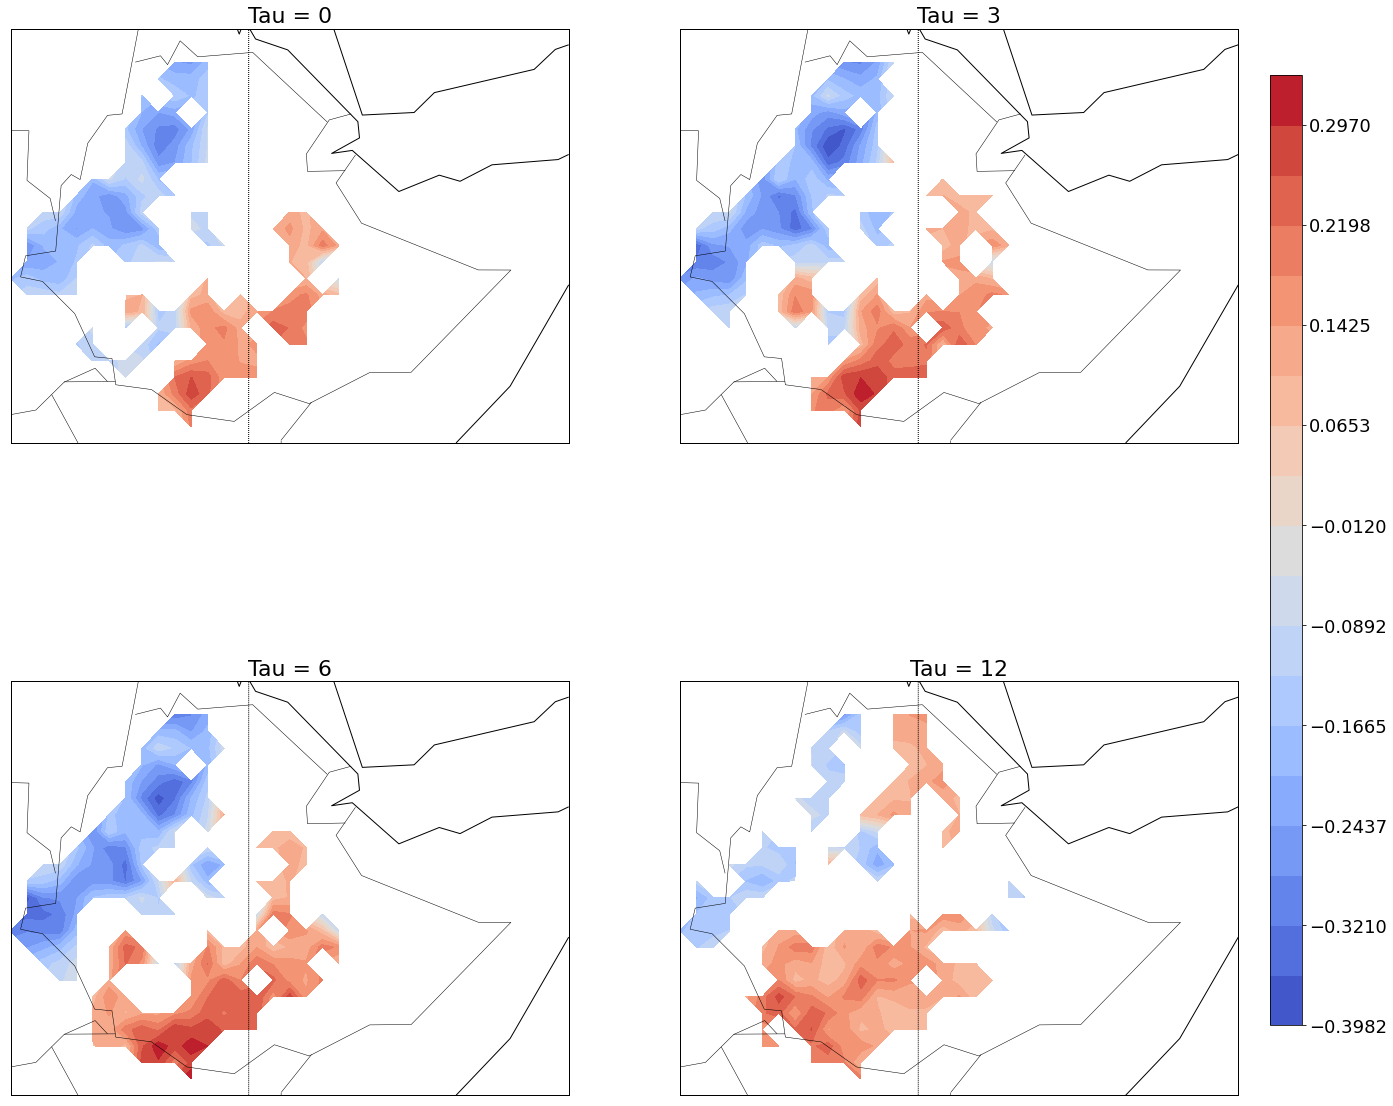

In [57]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ET_ONI_SPI_{}_{}.png".format(train_start,validation_end))

# ZW SPI

In [82]:
lat_list = np.load("ZW_lat_list.npy")
lon_list = np.load("ZW_lon_list.npy")

In [83]:
train_start = 1950
validation_end = 2010
level = 0.05
tau = 0

In [84]:
result = ff.timeseries_enso("ZW_gamma_18912015_12.npy", start_year = train_start, end_year=validation_end, base_year = 1922)

nino = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
#nino  = np.array(nino[11:])

In [85]:
nino_temp = nino
result_temp = result

corr = []
for j in range(result_temp.shape[1]):
    r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    #r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [86]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [87]:
lat = np.array(lat)
lon = np.array(lon)

lon = np.arange(24.75,33.75,0.5)
lat = np.arange(-14.75,-23.25,-0.5)

deg = np.zeros((len(lat),len(lon)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values
        else:
            deg[i,j]=np.nan


/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """Entry point for launching an IPython kernel.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


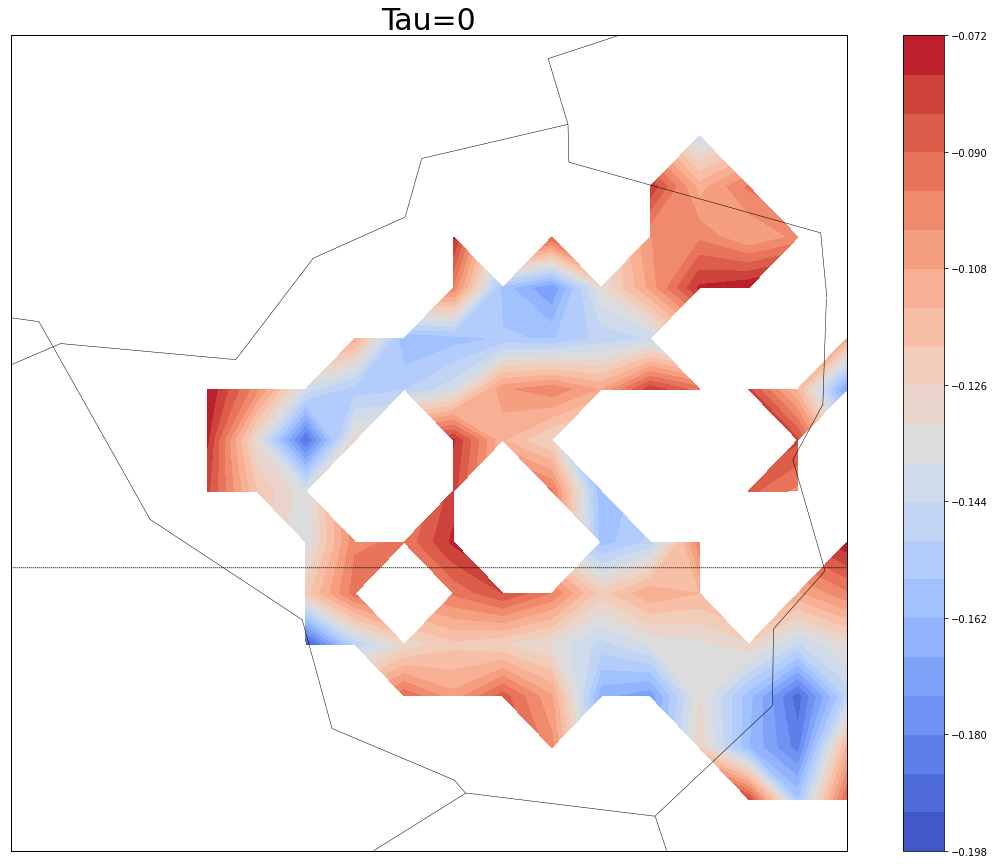

In [88]:
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau={}".format(tau), fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
plt.savefig("ZW_SPI_{}.png".format(tau))



In [89]:
ONI_0_SPI = deg.copy()

In [90]:
lon1 = lon
fontsize = 22

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

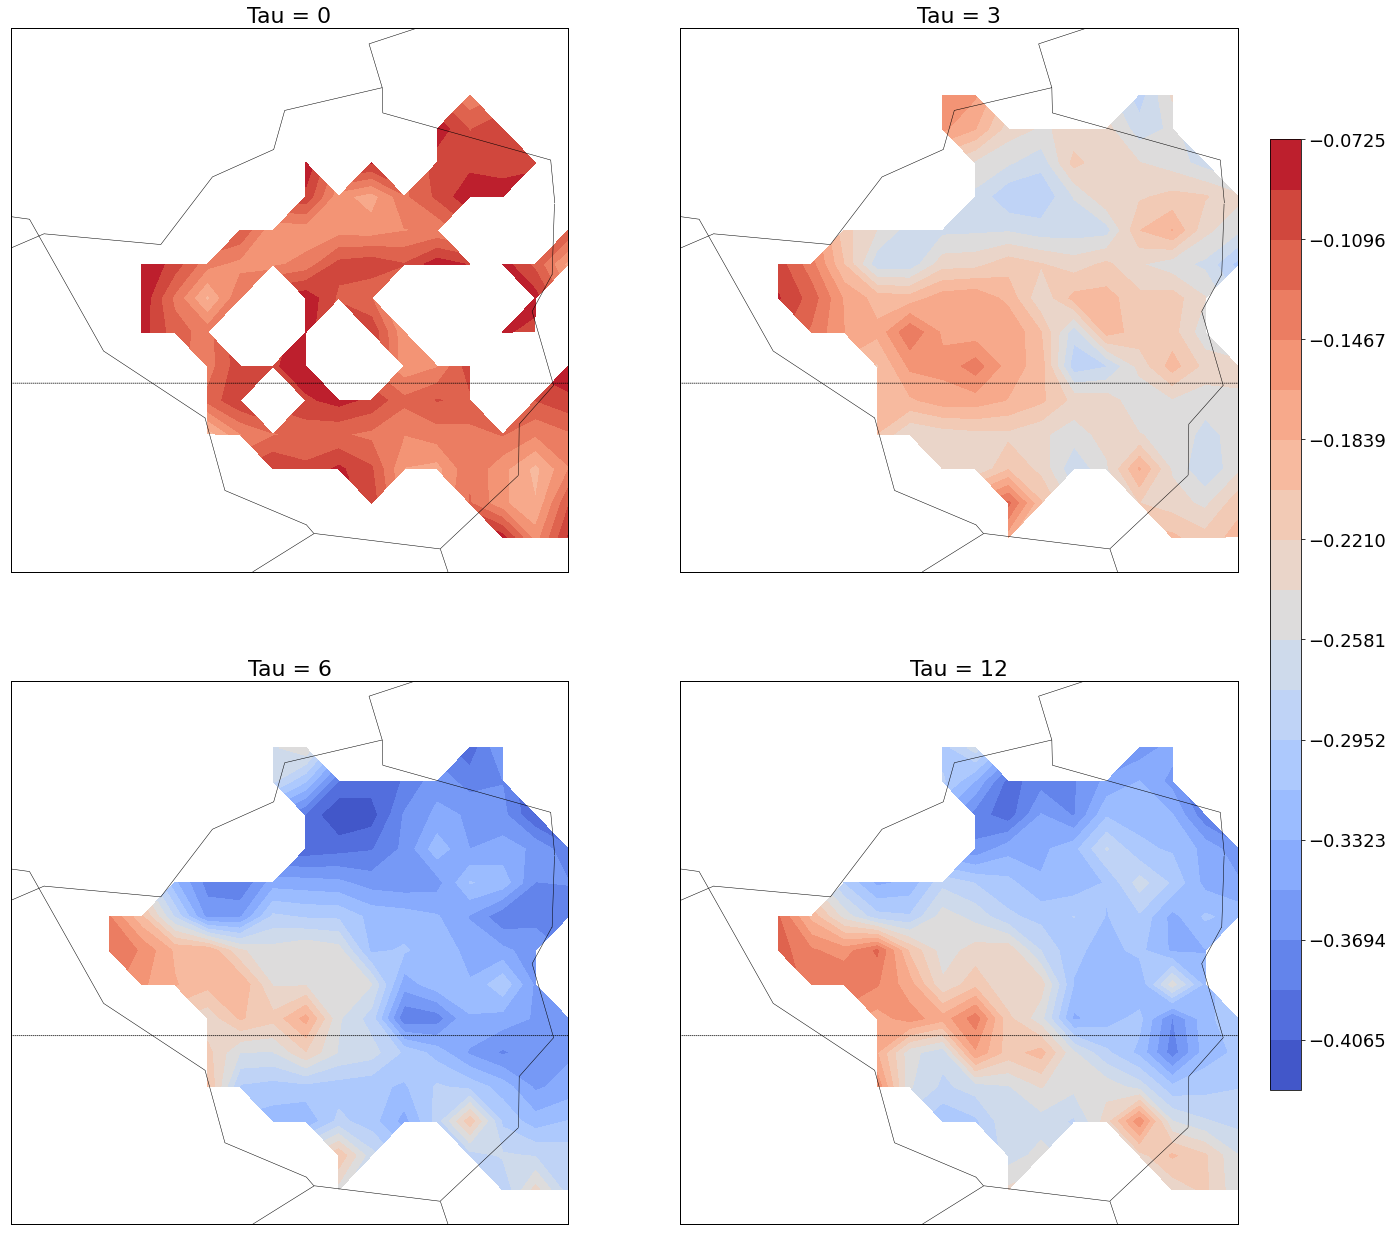

In [91]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ZW_ONI_SPI_{}_{}.png".format(train_start,validation_end))

# NE SPI

In [110]:
lat_list = np.load("NE_lat_list.npy")
lon_list = np.load("NE_lon_list.npy")

train_start = 1950
validation_end = 2010
level = 0.05
tau = 0

In [111]:
result = ff.timeseries_enso("NE_gamma_18912015_12.npy", start_year = train_start, end_year=validation_end, base_year = 1922)

nino = ff.timeseries_enso('oni.npy', start_year = train_start , end_year=validation_end, base_year = 1950)
#nino  = np.array(nino[11:])

In [112]:
nino_temp = nino
result_temp = result

corr = []
for j in range(result_temp.shape[1]):
    r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    #r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [113]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


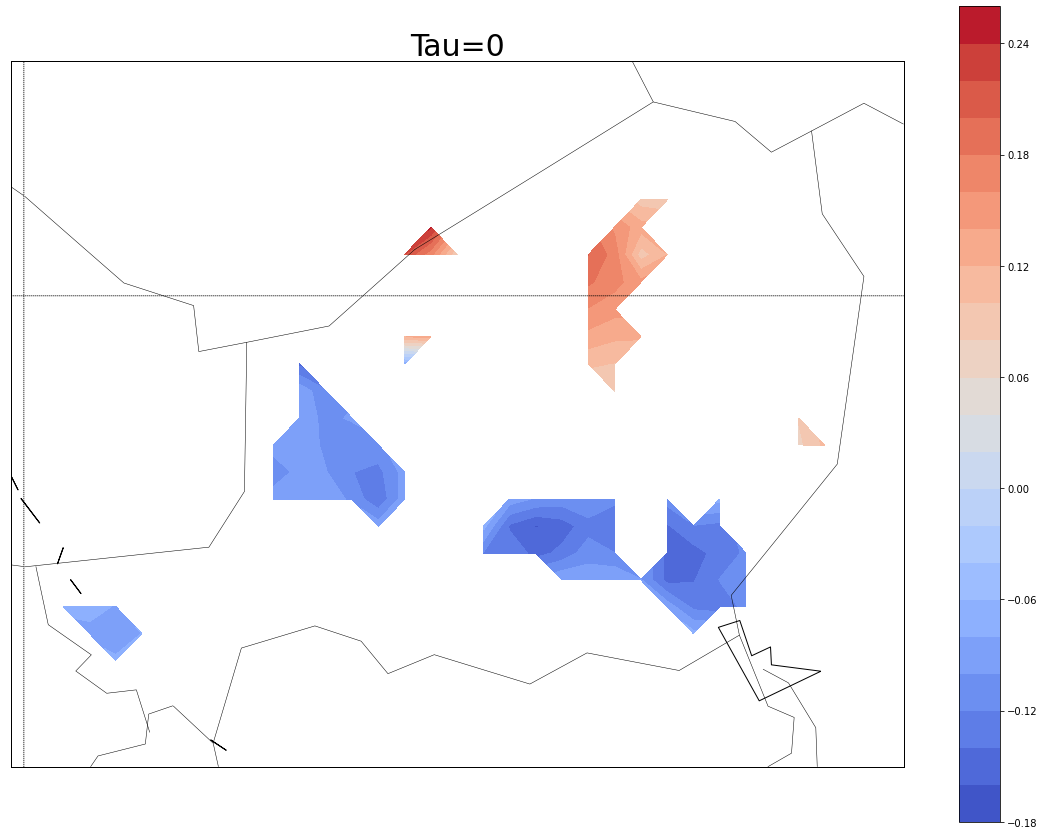

In [114]:
lon = np.arange(-0.25,17.25,0.5)
lat = np.arange(24.25,10.75,-0.5)

deg = np.zeros((len(lat),len(lon)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon[j])].pc.values
        else:
            deg[i,j]=np.nan


m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon.min(), \
  urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau={}".format(tau), fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
plt.savefig("NE_SPI_{}.png".format(tau))



In [115]:
ONI_0_SPI = deg.copy()

In [116]:
lon1 = lon
fontsize = 22

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

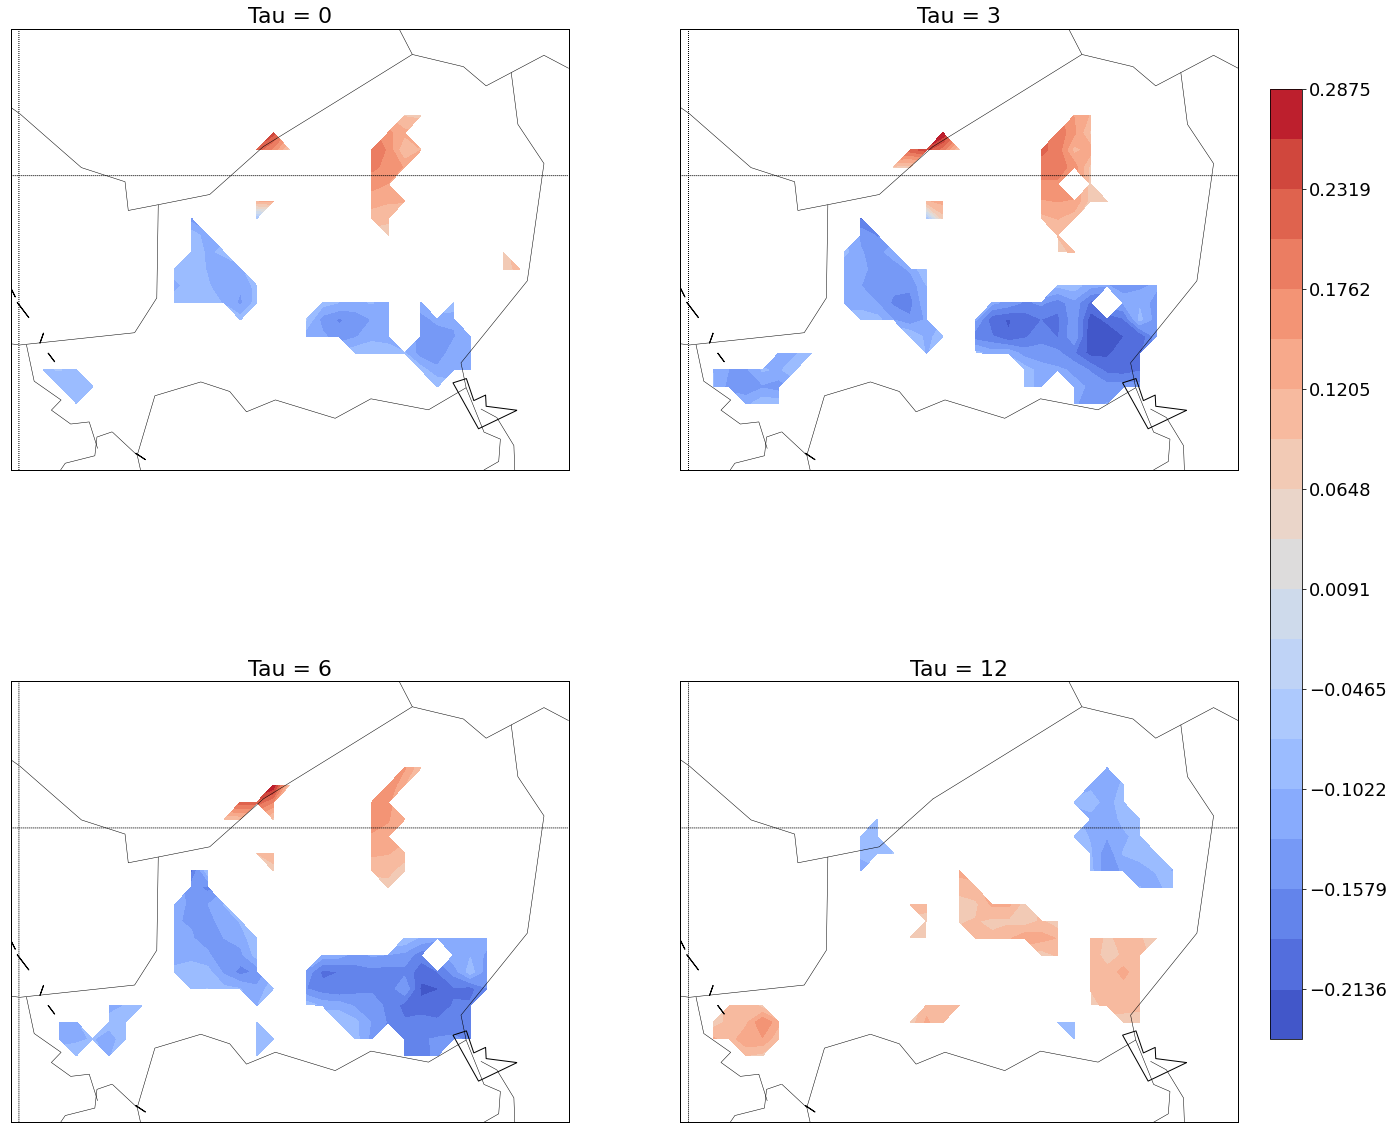

In [117]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("NE_ONI_SPI_{}_{}.png".format(train_start,validation_end))

In [23]:
d = Dataset('../../../nc/GPCC_half.nc')

In [16]:
#d

In [27]:
steps = [2,5,8,11]
seasons = ['DJF', 'MAM', 'JJA', 'SON']
tau = 0

In [29]:
for ijz in range(len(steps)):
    level = 0.05
    train_start = 1950
    validation_end = 2015

    temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    result = sst.get_data()
    lon_list = sst.get_lon_list()
    lat_list = sst.get_lat_list()
    lon = sst.get_lon()
    lat = sst.get_lat()


    nino = np.load("nino_1950.npy")
    nino = nino[11:]

    d = []
    for i in np.arange(steps[ijz], 781, 12):
        d.append(i-2)
        d.append(i-1)
        d.append(i)

    d = np.array(d)

    nino_temp = nino[d]
    result_temp = result[d,:].copy()

    corr = []
    for j in range(result_temp.shape[1]):
        r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
        #r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan
                
    np.save("{}_NINO_{}.npy".format(seasons[ijz],tau),deg)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [64]:
DJF = np.load("DJF_NINO_0.npy")
MAM = np.load("MAM_NINO_0.npy")
JJA = np.load("JJA_NINO_0.npy")
SON = np.load("SON_NINO_0.npy")

In [7]:
DJF_NINO = np.load("../../npy_files/DJF_NINO.npy")
MAM_NINO = np.load("../../npy_files/MAM_NINO.npy")
JJA_NINO = np.load("../../npy_files/JJA_NINO.npy")
SON_NINO = np.load("../../npy_files/SON_NINO.npy")

In [48]:
SON.shape

(156, 180)

In [58]:
lat2.shape

(156, 180)

In [44]:
y.shape

(156, 180)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


ValueError: operands could not be broadcast together with shapes (160,180) (156,180) 

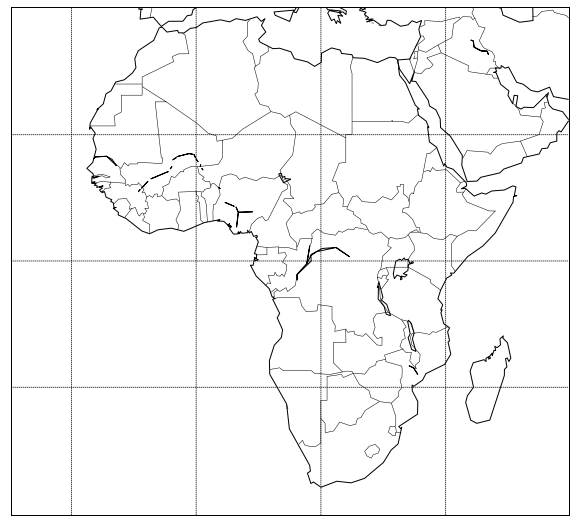

In [34]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF_NINO), np.nanmin(MAM_NINO), np.nanmin(JJA_NINO), np.nanmin(SON_NINO))
vmax = max(np.nanmax(DJF_NINO), np.nanmax(MAM_NINO), np.nanmax(JJA_NINO), np.nanmax(SON_NINO))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON_NINO,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
#fig.savefig("NINO_rainfall_12.png")

In [ ]:

for ijz in range(len(tau)):
    level = 0.05
    train_start = 1950
    validation_end = 2015

    #temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    #sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    #result = sst.get_data()
    #lon_list = sst.get_lon_list()
    #lat_list = sst.get_lat_list()
    #lon = sst.get_lon()
    #lat = sst.get_lat()


    nino = np.load("oni.npy")
    nino = nino[11:]

    corr = []
    for j in range(result_temp.shape[1]):
        if tau[ijz] == 0:
            r, p =st.pearsonr(nino, np.ravel(result[:,j]))
        else:
            r, p =crosscorr(np.ravel(result[:,j]),nino,tau[ijz])
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan
                
    np.save("ONI_{}_c.npy".format(tau[ijz]),deg)

In [362]:
tau = [0,3,6,12]
for ijz in range(len(tau)):
    level = 0.05
    train_start = 1950
    validation_end = 2015

    #temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    #sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    #result = sst.get_data()
    #lon_list = sst.get_lon_list()
    #lat_list = sst.get_lat_list()
    #lon = sst.get_lon()
    #lat = sst.get_lat()

    result = np.load("afric_gamma_19502015_25_12.npy")
    nino = np.load("nino.npy")
    nino = nino[-409:]

    corr = []
    for j in range(result.shape[1]):
        if tau[ijz] == 0:
            r, p =st.pearsonr(nino, np.ravel(result[:,j]))
        else:
            r, p =crosscorr(np.ravel(result[:,j]),nino,tau[ijz])
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-28.75, 59.75, 2.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan
                
    np.save("NINO_{}_SPI.npy".format(tau[ijz]),deg)

In [363]:
ONI_0_SPI = np.load("NINO_0_SPI.npy")
ONI_3_SPI = np.load("NINO_3_SPI.npy")
ONI_6_SPI = np.load("NINO_6_SPI.npy")
ONI_12_SPI = np.load("NINO_12_SPI.npy")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

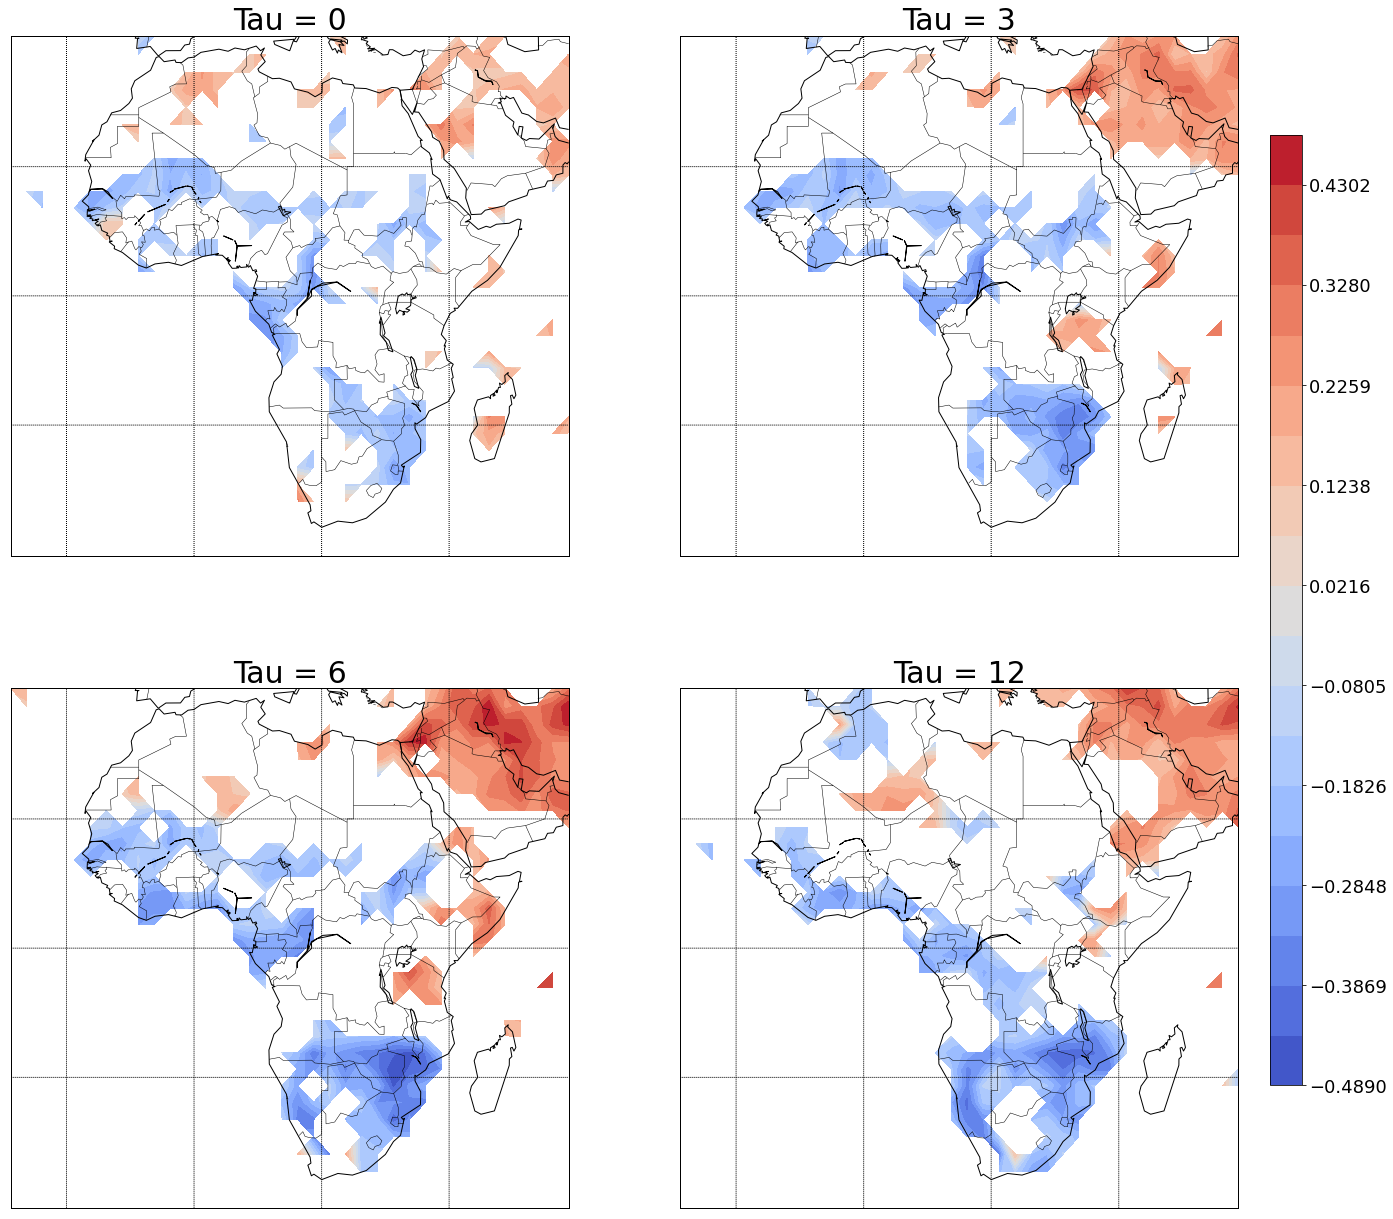

In [364]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_SPI), np.nanmin(ONI_3_SPI), np.nanmin(ONI_6_SPI), np.nanmin(ONI_12_SPI))
vmax = max(np.nanmax(ONI_0_SPI), np.nanmax(ONI_3_SPI), np.nanmax(ONI_6_SPI), np.nanmax(ONI_12_SPI))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_SPI,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("NINO_SPI.png")

In [366]:
file1 = open('NINO_1950_2015.txt', 'r')
Lines = file1.readlines()

NINO = []
for line in Lines:
    l = line.split()
    for i in range(1, len(l)):
        NINO.append(float(l[i]))
#nino = np.array(NINO[11:])

In [367]:
np.save("nino_1950.npy",NINO)

In [332]:
nino = nino[-409:]

In [333]:
len(nino)

409

In [334]:
spi.shape

(409, 640)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

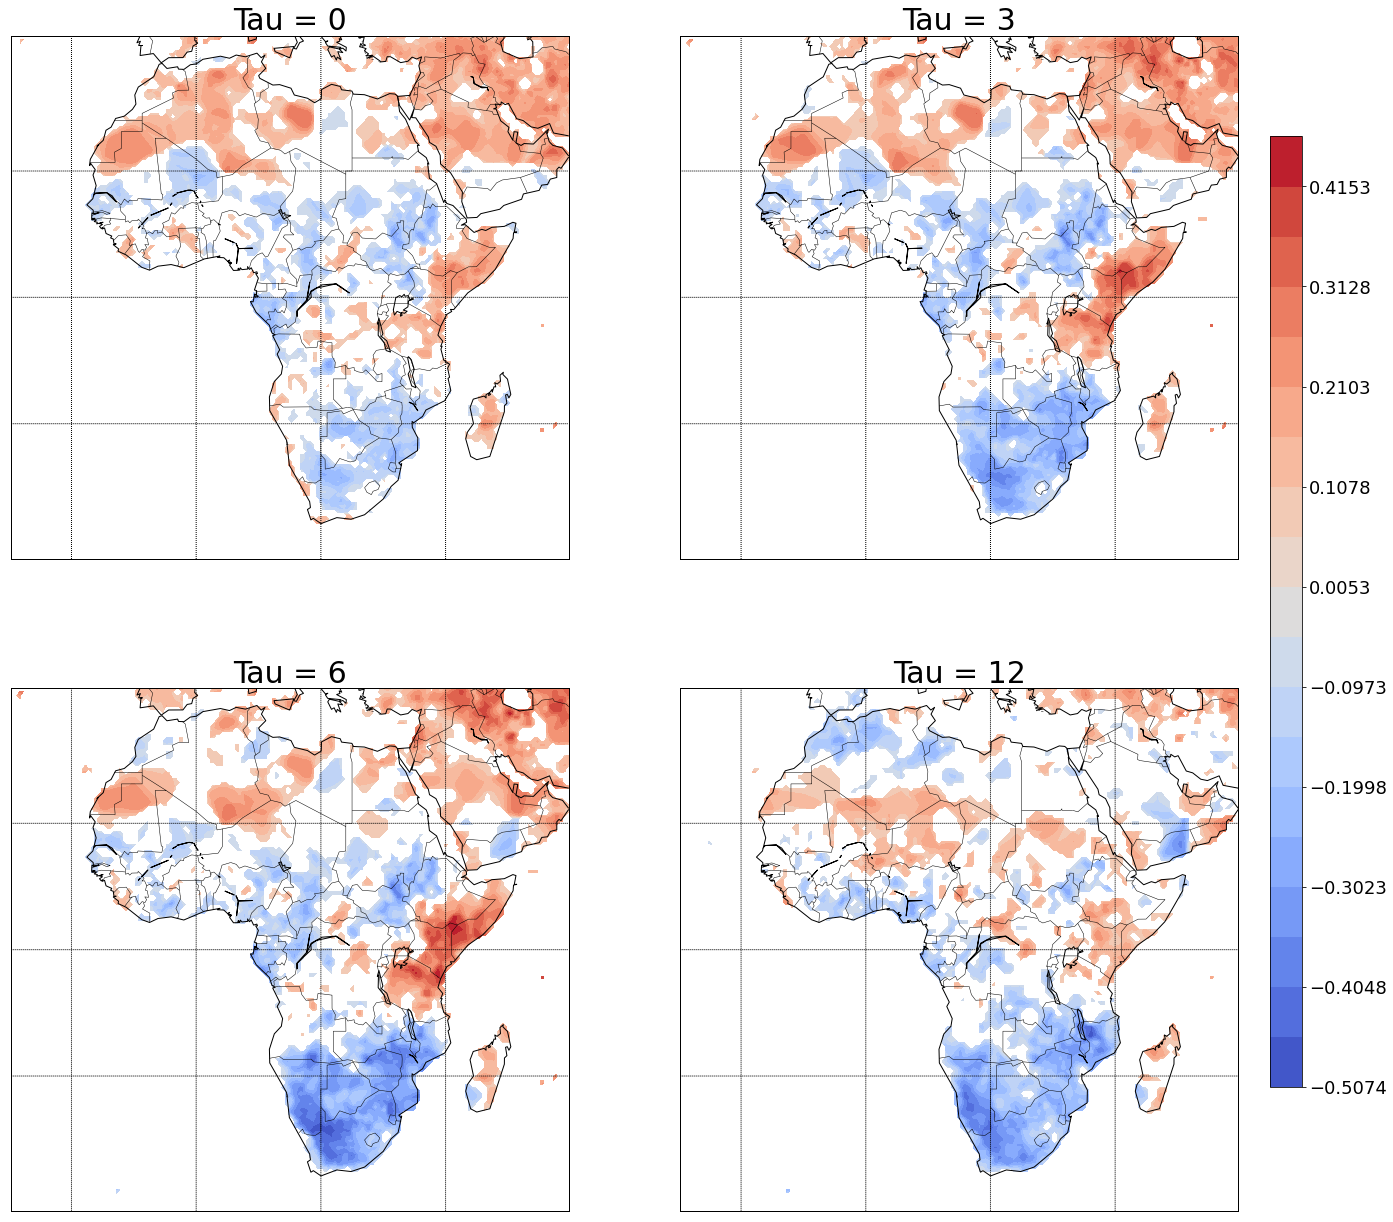

In [309]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(ONI_0_c), np.nanmin(ONI_3_c), np.nanmin(ONI_6_c), np.nanmin(ONI_12_c))
vmax = max(np.nanmax(ONI_0_c), np.nanmax(ONI_3_c), np.nanmax(ONI_6_c), np.nanmax(ONI_12_c))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_0_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 0", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_3_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 3", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_6_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 6", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("Tau = 12", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ONI_rainfall_c.png")

In [21]:
sst = Data('../../../nc/GPCC_africa_2.5.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [22]:
len(lon)

34

In [339]:
len(lon_list)

640

In [298]:
r = pd.DataFrame(result)

In [299]:
RFThree = r.rolling(12).apply(sum)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


In [300]:
RFThree = RFThree.iloc[12 - 1:,:]

In [301]:
temporal_limits = {"time_min":datetime(train_start, 1, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

In [302]:
result = RFThree.values

In [318]:
    nino = np.load("oni.npy")
    nino = nino[-409:]

In [320]:
nino.shape

(409,)

In [324]:
781 - 360 - 12

409

In [330]:
66 * 12 - 11

781

In [316]:
spi = np.load("afric_gamma_19502015_25_12.npy")

In [311]:
spi.shape

(409, 640)

In [313]:
africa = np.load("africa_two_half.npy")

In [314]:
africa.shape

(781, 640)

In [315]:
spi

array([[ 0.0079325 , -2.32634787, -0.39820871, ...,  0.77846385,
        -0.6278653 , -0.74420781],
       [ 0.23686178,  6.99355442, -0.27735356, ...,  0.77971627,
        -0.26816972, -0.35506098],
       [ 0.70895352,  2.32634787,  0.23988206, ...,  0.65907329,
        -0.12598309, -0.04502008],
       ...,
       [-1.57598368,  0.52497086, -1.72059341, ..., -0.474975  ,
         2.32634787,  0.85500546],
       [-1.48275685,  0.78694927, -1.62172537, ..., -0.4109153 ,
         2.32634787,  1.05284828],
       [-1.48431332,  0.36721065, -1.6186768 , ..., -0.80442747,
         2.32634787,  1.15247069]])

In [12]:
level = 0.05
train_start = 1950
validation_end = 2015

temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [179]:
# Using readlines()
file1 = open('NINO_1950_2015.txt', 'r')
Lines = file1.readlines()

NINO = []
for line in Lines:
    l = line.split()
    for i in range(1, len(l)):
        NINO.append(float(l[i]))
nino = np.array(NINO[11:])

In [226]:
nino = np.load("oni.npy")
nino = nino[11:]

In [227]:
d = []
for i in np.arange(11, 781, 12):
    d.append(i-2)
    d.append(i-1)
    d.append(i)

In [228]:
d = np.array(d)

In [229]:
nino_temp = nino[d]
result_temp = result[d,:]

In [230]:
corr = []
for j in range(result_temp.shape[1]):
    #r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
    r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,6)
    if p<level:
        corr.append(r)
    else:
        corr.append(np.nan)

In [231]:
df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

lon_temp = df_sst["lons"].values
lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
df_sst["lons"].vlues = lon_temp

df_sst["pc"] = corr

In [11]:
lon1 = np.arange(-29.75,60,0.5)

In [232]:
#lon1 = np.arange(-178.75,179.0,2.5)
lon1 = np.arange(-29.75,60,0.5)
#lat1 = np.arange(-40,40,2.5)

deg = np.zeros((len(lat),len(lon1)))

lat_number = deg.shape[0]
lon_number = deg.shape[1]

for i in range(lat_number):
    for j in range(lon_number):
        if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
            deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
        else:
            deg[i,j]=np.nan

In [233]:
SON_ONI_6 = deg.copy()

In [234]:
np.save("SON_ONI_6.npy",deg)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


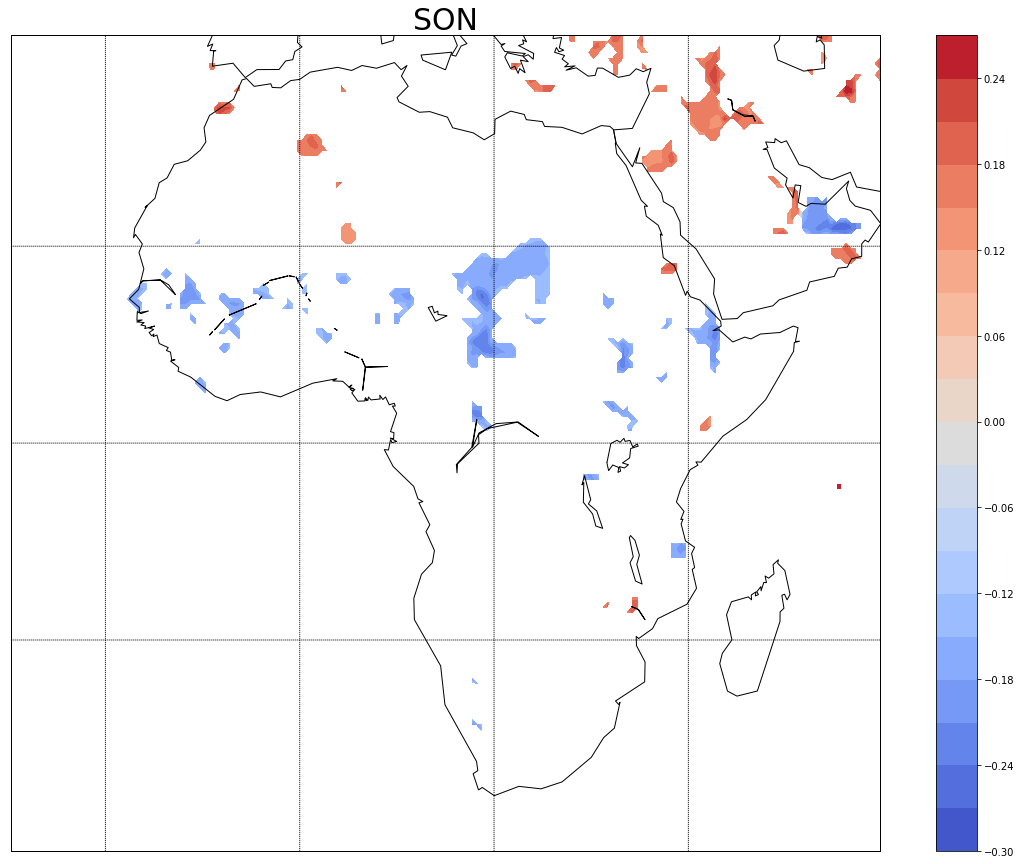

In [58]:
lon  = lon1
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

In [49]:
lon  = lon1
fontsize = 30

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

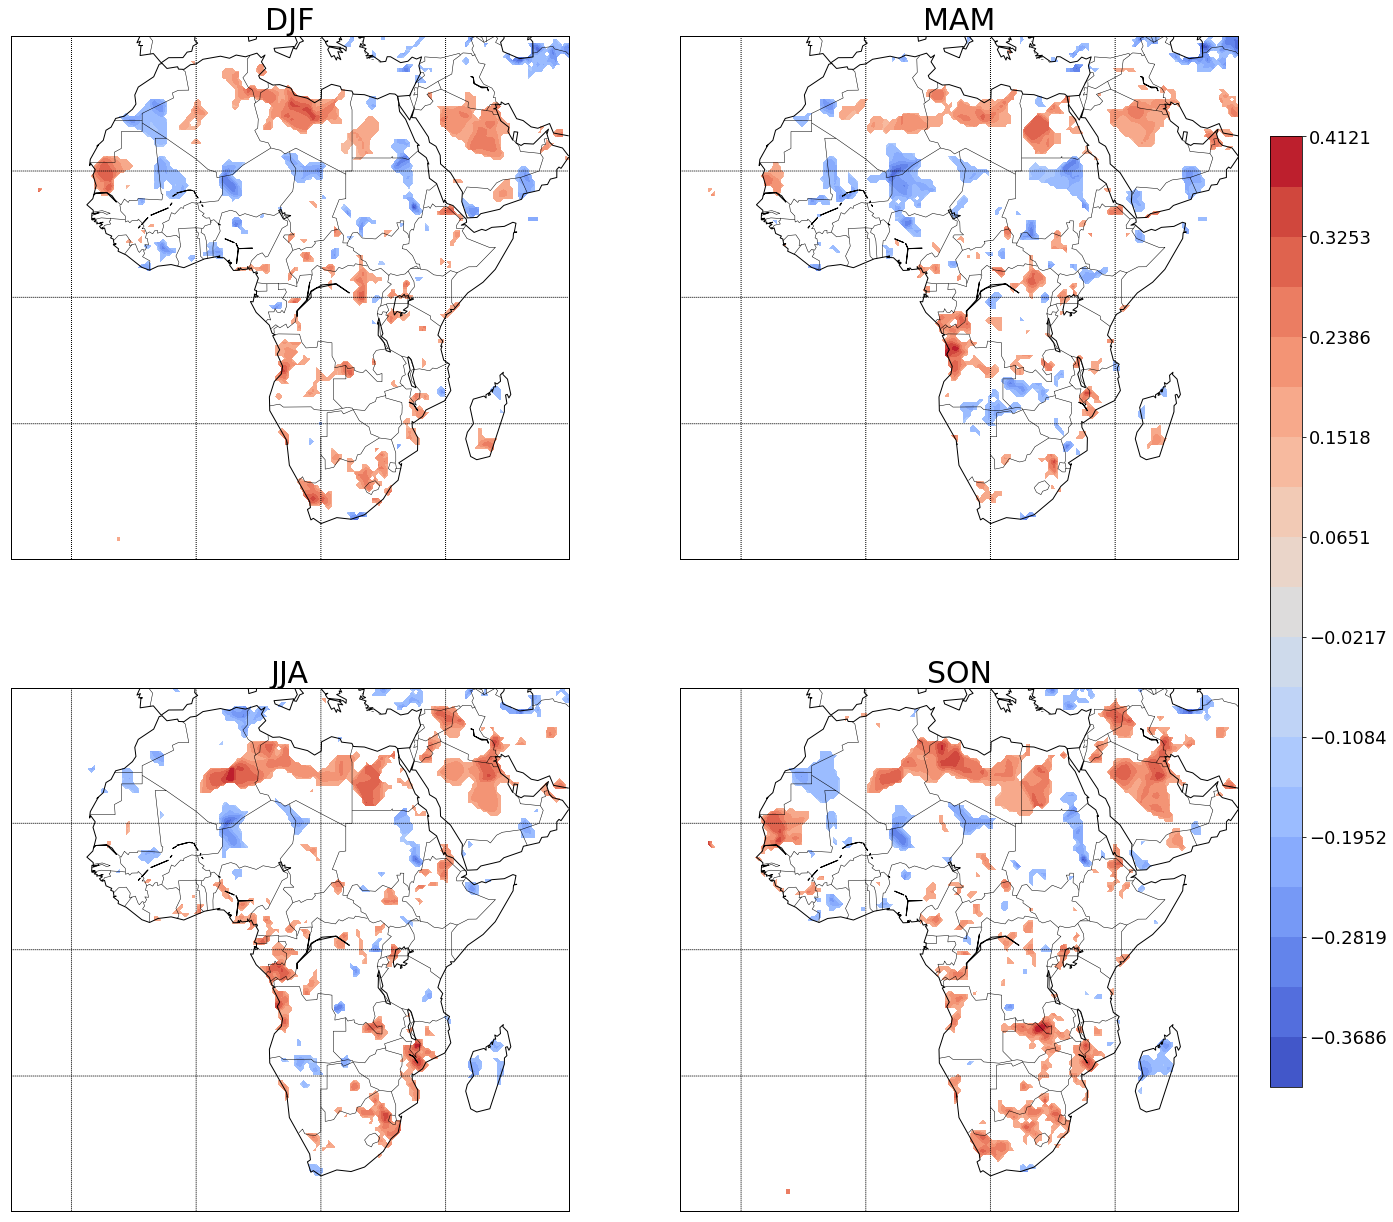

In [296]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF_ONI_12_c), np.nanmin(MAM_ONI_12_c), np.nanmin(JJA_ONI_12_c), np.nanmin(SON_ONI_12_c))
vmax = max(np.nanmax(DJF_ONI_12_c), np.nanmax(MAM_ONI_12_c), np.nanmax(JJA_ONI_12_c), np.nanmax(SON_ONI_12_c))
clevs = np.linspace(vmin, vmax, 20)
lon2, lat2 = np.meshgrid(lon1,lat)

fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON_ONI_12_c,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("ONI_rainfall_12_c.png")

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecati

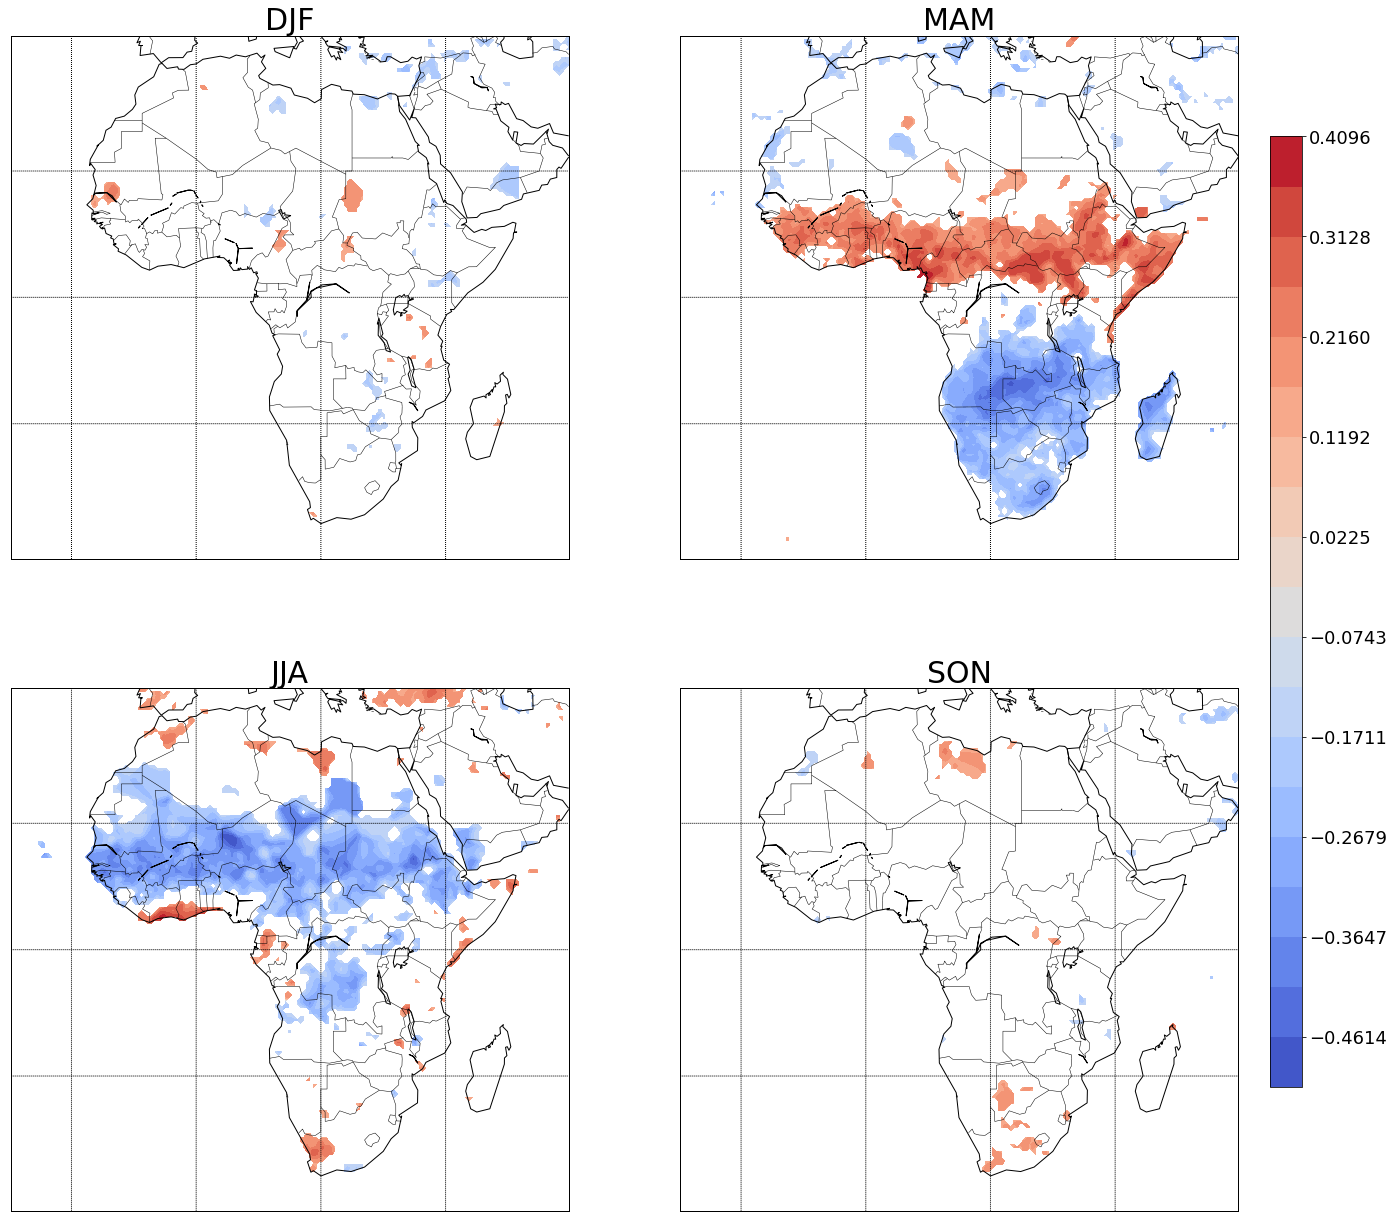

In [192]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF_NINO_12), np.nanmin(MAM_NINO_12), np.nanmin(JJA_NINO_12), np.nanmin(SON_NINO_12))
vmax = max(np.nanmax(DJF_NINO_12), np.nanmax(MAM_NINO_12), np.nanmax(JJA_NINO_12), np.nanmax(SON_NINO_12))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON_NINO_12,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
fig.savefig("NINO_rainfall_12.png")

In [15]:
lon2, lat2 = np.meshgrid(lon,lat)

In [18]:
MAM.shape

(160, 180)

In [20]:
len(lat)

156

In [122]:
def timeseries_enso(file_name, start_year = 1950, end_year=2015, base_year = 1950):
    start_index = (start_year - base_year) * 12   
    end_index = start_index + (end_year - (start_year - 1))*12
    data = np.load(file_name)
    return(data[start_index:end_index])

In [135]:
steps = [2,5,8,11]
seasons = ['DJF', 'MAM', 'JJA', 'SON']
tau = 0

In [136]:
file_name = "nino_1891_2015.npy"

In [161]:
train_start = 1950
validation_end = 2015
level = 0.05

In [162]:
nino_data = timeseries_enso(file_name, start_year=train_start, end_year=validation_end, base_year=1891)

In [212]:
level = 0.05
train_start = 1950
validation_end = 2015

temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

result = sst.get_data()
lon_list = sst.get_lon_list()
lat_list = sst.get_lat_list()
lon = sst.get_lon()
lat = sst.get_lat()

In [164]:
nino = np.load("nino_1950_2015.npy")
nino = nino[11:]

In [165]:
    d = []
    for i in np.arange(5, 781, 12):
        d.append(i-2)
        d.append(i-1)
        d.append(i)

    d = np.array(d)

In [166]:
    nino_temp = nino[d].copy()
    result_temp = result[d,:].copy()

In [173]:
    nino_temp = nino[d].copy()
    result_temp = result[d,:].copy()

    corr = []
    for j in range(result_temp.shape[1]):
        r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
        #r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

0.0008617653857310078
0.005155840749313319
0.0026894587467574324
0.01685786871636644
8.745987375862603e-06
0.0017725505445309773
2.2027919325672203e-05
0.0009044579034500553
0.009745656233738919
0.0007004329027120715
0.0001611457247453968
0.00040487390808250615
0.04702572202844952
0.0030515775496117816
0.02095062252488578
0.0031228521082679863
6.006313979652412e-06
0.00022825248852058309
0.04549733546721988
0.03451432472385514
0.02185653053460066
0.028105956321897677
0.04555325317440104
7.187932014683696e-05
0.0005960616748468025
0.03268859466071118
0.010360545151191817
0.018063438981191424
0.02417917336793316
0.04237453358538141
0.009354674553650395
0.015177492262724324
0.024607107244578146
0.04714088085643005
0.02643897356401755
0.005491061139525132
0.01008702642441055
0.011788812563339055
0.02440477112913681
0.01808377176178294
0.021817009108390403
2.207020683324827e-05
4.676658374405555e-05
0.011583859264429092
0.00823906102277042
0.0024776021968110976
0.0017729852747719924
0.02546

0.006041465863557684
0.0010210315462216922
0.0006008220181864132
0.0004951445027059822
0.0004137369508351263
0.00022150923241835997
0.00019778180874587358
0.0004577867005924802
0.0004975266893717768
0.00022528277000554963
0.0007788410632778307
0.00016292448444471769
0.00025863124269456995
0.0007813214465615265
0.0021716132423537557
0.00018273401108802274
2.2232897402511063e-05
2.262170894971417e-05
0.000272482117390169
0.001915956573574388
0.005355400928246466
0.007214532082687824
0.028377421701595268
0.021214929198414875
0.028573830098095894
0.010729809718204747
0.0006408905926112433
0.0004364492119364775
0.001005493689542739
0.0017965216530016687
0.003909934362334078
0.02355055777893917
0.010104274218192698
0.023027156518506113
0.0014884809779966118
0.0009588138449346385
0.0011683071061465648
0.001410560507073425
0.000834703529610649
0.0004197784594166319
0.000754276874705448
0.0005516151240509722
0.0005158393335008166
0.0010339419755599545
0.00040252565746742115
0.001351135831231716

0.007251869199238934
0.016978658528983757
0.01497500193385272
0.0052436341195152844
0.003375456876951349
0.003562655255897347
0.004645808421414175
0.005477684035043318
0.005578527864397618
0.004142592567493683
0.000743744117784273
0.0007260448818513607
0.03835135695604786
0.016804048696727546
0.014210805411215246
0.0065591771833766995
0.0024295597489141572
0.0011480647304274243
0.0016995326563061111
0.0021652068653752188
0.0006329915264464967
7.491613923265035e-05
4.9556347443520045e-05
8.479528634658279e-05
0.00011883315713589261
3.53994482807992e-05
4.2619691692740255e-05
0.0002388563138298453
0.0027126362953055214
0.0012463700715777185
8.389123930201031e-05
2.622000244923418e-05
1.0823485044298259e-05
0.008390669410478025
0.021488458880079754
0.04029047007878846
0.022679668258812433
0.022572885161462466
0.027403181614688833
0.03596382074480071
0.04221136807899946
0.035780021153125584
0.009173123826439799
0.001786414163461253
0.01571742535905637
0.024558130666389556
0.027220783762994

0.03038478871190776
0.029673133892485257
0.0073279177201292555
0.002718592458374902
0.005385809236118931
0.014025418996031769
0.013355834022941146
0.01747682918516507
0.0009460260955101035
0.00021047977036548192
0.00018240508822453685
6.662669850166243e-05
3.6547797844160635e-06
6.803293781855669e-07
4.041016432933929e-07
4.871363299975751e-07
9.553081908152212e-08
1.8291494446860034e-09
1.1593425234340636e-09
1.3572968311069163e-09
1.5268456488464168e-09
1.0860739763655211e-09
1.1528524411774338e-09
2.3687159658444072e-09
1.026093321879248e-07
4.476557461847713e-07
3.65976628284165e-07
4.4348028453646326e-07
5.238764024146832e-07
1.874631756850182e-07
6.0809328000087856e-09
4.308233852877074e-09
1.960333691010929e-08
1.1713342934768257e-07
3.34751839966561e-07
8.964461951142862e-08
1.2266246129254938e-06
2.161976758874869e-05
1.0955171038620435e-06
2.2041508591888344e-07
4.178439364411244e-07
2.673243811028851e-07
4.00234726012036e-07
1.6314491975133481e-07
3.309688884967218e-07
2.528

0.033586868624891304
0.017090371948855373
0.014032175731206636
0.01273966333808506
0.012515202603717055
0.013258386338384132
0.012301208748960114
0.011506868065919449
0.010400025564228501
0.00850739270747967
0.004172958283964307
0.0006623825790440231
0.0007735816123656256
0.00256783634142363
0.0017839417076893583
0.002522622115052138
0.0031556452578545393
0.003606509117924447
0.004991702372583817
0.016630053985849876
0.040352682258265965
0.02256258154266543
0.009607008519671634
0.0031234055321111643
0.00014958827875218147
0.0002572014142855373
0.0008617031529856717
0.004240324368626238
0.003228598206453325
0.0015821558825739289
8.876836830442953e-05
4.4527094146459064e-05
0.0001162441490489511
0.0001836597036695225
0.00014257876139274256
1.2042553298029973e-05
1.6772299921465547e-05
2.426506173509205e-05
1.919549178235114e-05
1.97455990465685e-05
0.00020957867483041684
0.007284368618774628
0.0031370484071264956
0.0010254755230841236
0.011896221828969355
0.0271368460178297
0.01745030099

7.299156177001975e-08
4.0748704931590903e-07
2.4828022488472185e-05
0.0004980861231266228
0.0011627222684409493
0.04627542331493421
0.04729448795179949
0.03664738108223367
0.03670533528717908
0.022797548455669014
0.02382338281804451
0.01821328533017461
0.0026525066647573236
0.0005786588744269571
0.00020525124573364588
5.901613174415815e-05
4.156337779698042e-05
3.6227556509845595e-05
2.772311101526362e-05
5.144759716044995e-05
5.059359496128357e-05
0.0001309483146844253
0.0003024480770793857
0.0001276963976528485
9.144044847236957e-05
0.00028447523618248927
0.0005661978725868282
0.001061419258049191
0.0030798912659036307
0.0018264306251054698
0.0005378194066297088
0.0006560697762249663
0.0010010760663884618
0.0009052275998168104
0.003498494994013324
0.002606728467092937
0.008321132752758404
0.027028603094536342
0.013944245478289785
0.0452232843075168
0.002293761640136994
7.599261209781708e-05
1.2489152280606855e-05
2.581674883982337e-05
2.2510855937207887e-05
5.925025830960672e-07
5.45

9.333784997811912e-09
8.846599020312042e-08
2.524857360340495e-09
3.124032116819081e-10
4.2926249881152254e-11
1.94736157984921e-11
6.643511236281599e-12
1.4613646040805168e-11
1.231340767901593e-08
1.3063567182321932e-08
1.60433719677164e-08
1.7468275542553494e-07
6.048156960121958e-08
3.180088967919187e-08
6.041095762897807e-08
4.457064177196313e-06
1.5701070158708566e-05
2.2636766340057054e-05
5.736910220497528e-05
1.1825851169016626e-05
7.092345655839041e-07
2.907792707699259e-06
3.273632361662218e-05
0.0010698849102340525
0.0009269320423915344
0.0018765185014569317
0.0003859693240017526
0.0013408263588351188
0.0016436489345048033
0.0003613847165678992
0.0007499197781988274
0.0023012219239230245
0.017786994576268374
0.04143937980211852
0.04516706624232959
0.03845315931276842
0.038628073074728
0.02925198008445399
0.03097018871681236
0.04584683502182481
0.027066578817446892
0.007215771326385465
0.0026300614894145024
0.014411402085839282
0.022850326014637774
0.0015941062594861423
0.00

0.04720577033507491
0.034364123234624844
0.044999955005503446
0.012812518480106195
0.003465606954950625
0.01755849660178009
0.034612050292269145
0.01894491684763156
0.015425358677459549
0.01317613988693204
0.010440429725435236
0.012035584794261641
0.0069734128675591365
0.0019369409473729887
0.002576790897909743
0.0017239249681262818
0.002849026445960272
7.528611016523958e-06
1.3655953871905171e-05
4.738898163955333e-05
0.000513597530948197
0.005274854395406129
0.0013606884867865795
0.0038043891945039243
0.0003810400563529367
0.0005029249431632317
0.0006162550553112913
0.0028035904136765044
0.038055816027610656
0.027014735983723587
0.02267873248461708
0.023191476332095524
0.009657352348514751
0.003106417333531374
0.006378169336706128
0.019018862479050366
0.02773394422807411
0.007672899000605741
1.5975194283175888e-06
1.3965553005460971e-06
4.00027197396275e-06
6.836046708811065e-06
5.658481184601578e-06
3.263880544698106e-07
1.0449679802000913e-06
3.2798691278350606e-06
7.73178301256036

0.03497363048507074
0.007938576493971979
0.044892681774103375
0.03600564348237272
0.012101940035723154
0.00013091525466849116
0.014476509391670923
0.01644263073391329
0.022264047175559597
0.017924039935129834
0.0035588690015660907
0.011355477460901679
0.02880850871177563
0.03792206599274881
0.036878703355033376
0.023733667254317276
0.01177567907431853
0.021695423433420295
0.0011919012250818544
0.011513019362355926
0.01644507496893868
0.004032117949718106
0.002855987340771702
0.023789703860388402
0.0349115823416288
0.034976594073083574
0.04008259046308581
0.03891054592866462
0.014629528202351243
0.002060638193463115
0.006339482809367988
0.014642640300276727
0.005090440815721974
0.0016661992474653654
0.004520497599522213
0.011320650302957189
0.03405684606319553
0.04489072975179273
0.02055755532764829
0.0028974825743551887
0.0025547360565309077
0.004600231754023744
0.0339030719256586
0.037751939215983056
0.0005357496303082012
0.0010006730686344758
0.004940266083905237
0.015003345328606118

In [169]:
    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


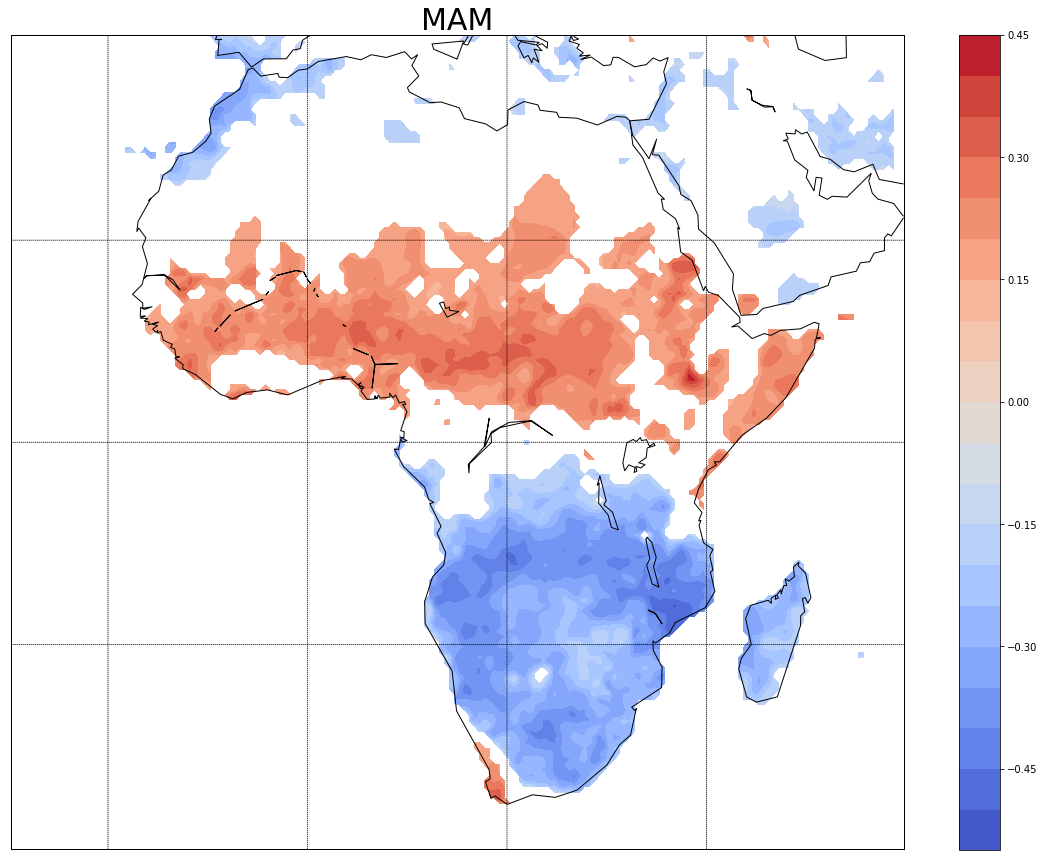

In [170]:
lon  = lon1
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')

lon2, lat2 = np.meshgrid(lon,lat)
x, y = m(lon2, lat2)
fig = plt.figure(figsize=(20,15))
#m.fillcontinents(color='gray',lake_color='gray')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(x,y,deg,20,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = 30)
#cbar.ax.tick_params(labelsize=25)
plt.colorbar();
#plt.savefig("EOF{}.png".format(pc))

In [225]:
lebel = 0.05

In [230]:
r, p = st.pearsonr(nino_temp, np.ravel(result_temp[:,100]))

In [231]:
r

0.04116742089180092

In [232]:
p

0.5677162788232686

In [177]:
for ijz in range(len(steps)):
    level = 0.05
    train_start = 1950
    validation_end = 2015

    temporal_limits = {"time_min":datetime(train_start, 12, 1, 0, 0),"time_max":datetime(validation_end, 12, 1, 0, 0)}

    sst = Data('../../../nc/GPCC_half.nc',"precip", temporal_limits)

    result = sst.get_data()
    lon_list = sst.get_lon_list()
    lat_list = sst.get_lat_list()
    lon = sst.get_lon()
    lat = sst.get_lat()


    nino = np.load("nino_1950_2015.npy")
    nino = nino[11:]

    d = []
    for i in np.arange(steps[ijz], 781, 12):
        d.append(i-2)
        d.append(i-1)
        d.append(i)

    d = np.array(d)

    nino_temp = nino[d].copy()
    result_temp = result[d,:].copy()

    corr = []
    for j in range(result_temp.shape[1]):
        r, p =st.pearsonr(nino_temp, np.ravel(result_temp[:,j]))
        #r, p =crosscorr(np.ravel(result_temp[:,j]),nino_temp,tau)
        if p<level:
            corr.append(r)
        else:
            corr.append(np.nan)

    df_sst = pd.DataFrame({"lons":lon_list,"lats":lat_list})

    lon_temp = df_sst["lons"].values
    lon_temp[lon_temp > 180] = lon_temp[lon_temp > 180] -360
    df_sst["lons"].vlues = lon_temp

    df_sst["pc"] = corr

    #lon1 = np.arange(-178.75,179.0,2.5)
    lon1 = np.arange(-29.75,60,0.5)
    #lat1 = np.arange(-40,40,2.5)

    deg = np.zeros((len(lat),len(lon1)))

    lat_number = deg.shape[0]
    lon_number = deg.shape[1]

    for i in range(lat_number):
        for j in range(lon_number):
            if not df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values.size == 0:
                deg[i,j] = df_sst[(df_sst.lats == lat[i]) & (df_sst.lons == lon1[j])].pc.values
            else:
                deg[i,j]=np.nan
                
    np.save("{}_NINO_{}.npy".format(seasons[ijz],tau),deg)

/home/mathsys2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [213]:
sst.get_lat()

array([ 38.75,  38.25,  37.75,  37.25,  36.75,  36.25,  35.75,  35.25,
        34.75,  34.25,  33.75,  33.25,  32.75,  32.25,  31.75,  31.25,
        30.75,  30.25,  29.75,  29.25,  28.75,  28.25,  27.75,  27.25,
        26.75,  26.25,  25.75,  25.25,  24.75,  24.25,  23.75,  23.25,
        22.75,  22.25,  21.75,  21.25,  20.75,  20.25,  19.75,  19.25,
        18.75,  18.25,  17.75,  17.25,  16.75,  16.25,  15.75,  15.25,
        14.75,  14.25,  13.75,  13.25,  12.75,  12.25,  11.75,  11.25,
        10.75,  10.25,   9.75,   9.25,   8.75,   8.25,   7.75,   7.25,
         6.75,   6.25,   5.75,   5.25,   4.75,   4.25,   3.75,   3.25,
         2.75,   2.25,   1.75,   1.25,   0.75,   0.25,  -0.25,  -0.75,
        -1.25,  -1.75,  -2.25,  -2.75,  -3.25,  -3.75,  -4.25,  -4.75,
        -5.25,  -5.75,  -6.25,  -6.75,  -7.25,  -7.75,  -8.25,  -8.75,
        -9.25,  -9.75, -10.25, -10.75, -11.25, -11.75, -12.25, -12.75,
       -13.25, -13.75, -14.25, -14.75, -15.25, -15.75, -16.25, -16.75,
      

In [197]:
lat = np.arange(39.75,-40.25,-0.5)

In [198]:
lat

array([ 39.75,  39.25,  38.75,  38.25,  37.75,  37.25,  36.75,  36.25,
        35.75,  35.25,  34.75,  34.25,  33.75,  33.25,  32.75,  32.25,
        31.75,  31.25,  30.75,  30.25,  29.75,  29.25,  28.75,  28.25,
        27.75,  27.25,  26.75,  26.25,  25.75,  25.25,  24.75,  24.25,
        23.75,  23.25,  22.75,  22.25,  21.75,  21.25,  20.75,  20.25,
        19.75,  19.25,  18.75,  18.25,  17.75,  17.25,  16.75,  16.25,
        15.75,  15.25,  14.75,  14.25,  13.75,  13.25,  12.75,  12.25,
        11.75,  11.25,  10.75,  10.25,   9.75,   9.25,   8.75,   8.25,
         7.75,   7.25,   6.75,   6.25,   5.75,   5.25,   4.75,   4.25,
         3.75,   3.25,   2.75,   2.25,   1.75,   1.25,   0.75,   0.25,
        -0.25,  -0.75,  -1.25,  -1.75,  -2.25,  -2.75,  -3.25,  -3.75,
        -4.25,  -4.75,  -5.25,  -5.75,  -6.25,  -6.75,  -7.25,  -7.75,
        -8.25,  -8.75,  -9.25,  -9.75, -10.25, -10.75, -11.25, -11.75,
       -12.25, -12.75, -13.25, -13.75, -14.25, -14.75, -15.25, -15.75,
      

In [206]:
DJF.shape

(156, 180)

In [218]:
DJF = np.load("DJF_NINO_0.npy")
MAM = np.load("MAM_NINO_0.npy")
JJA = np.load("JJA_NINO_0.npy")
SON = np.load("SON_NINO_0.npy")

In [184]:
DJF = np.load("../../npy_files/DJF_NINO.npy")
MAM = np.load("../../npy_files/MAM_NINO.npy")
JJA = np.load("../../npy_files/JJA_NINO.npy")
SON = np.load("../../npy_files/SON_NINO.npy")

In [219]:
fontsize = 40

In [221]:
lon2

array([[336.25, 336.75, 337.25, ...,  57.75,  58.25,  58.75],
       [336.25, 336.75, 337.25, ...,  57.75,  58.25,  58.75],
       [336.25, 336.75, 337.25, ...,  57.75,  58.25,  58.75],
       ...,
       [336.25, 336.75, 337.25, ...,  57.75,  58.25,  58.75],
       [336.25, 336.75, 337.25, ...,  57.75,  58.25,  58.75],
       [336.25, 336.75, 337.25, ...,  57.75,  58.25,  58.75]],
      dtype=float32)

In [222]:
lon2, lat2 = np.meshgrid(lon1,lat)

In [223]:
len(lon2)

156

In [224]:
len(lon2)

156

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]
/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


ValueError: operands could not be broadcast together with shapes (156,180) (160,166) 

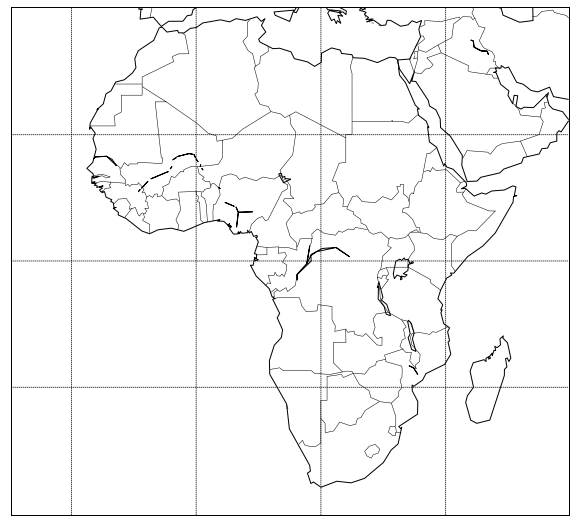

In [217]:
plt.rcParams['figure.figsize'] = (20,11)
vmin = min(np.nanmin(DJF), np.nanmin(MAM), np.nanmin(JJA), np.nanmin(SON))
vmax = max(np.nanmax(DJF), np.nanmax(MAM), np.nanmax(JJA), np.nanmax(SON))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(22)
fig.set_figwidth(22)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
#fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
m.drawcountries()
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


cbar_ax = fig.add_axes([0.92, 0.21, 0.02, 0.6])
cbar = fig.colorbar(cs, cax=cbar_ax)
cbar.ax.tick_params(labelsize=18)
#fig.colorbar(cs)
plt.show()
#fig.savefig("ENSO_rainfall.png")

In [60]:
DJF = DJF_NINO
MAM = MAM_NINO
JJA = JJA_NINO
SON = SON_NINO

/home/mathsys2/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  del sys.path[0]


ValueError: operands could not be broadcast together with shapes (160,180) (156,180) 

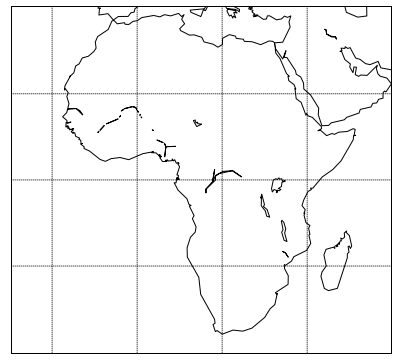

In [62]:
plt.rcParams['figure.figsize'] = (18,9)
vmin = min(np.nanmin(DJF), np.nanmin(MAM), np.nanmin(JJA), np.nanmin(SON))
vmax = max(np.nanmax(DJF), np.nanmax(MAM), np.nanmax(JJA), np.nanmax(SON))
clevs = np.linspace(vmin, vmax, 20)


fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

#
plt.subplot(2, 2, 1)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,DJF,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("DJF", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 2)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,MAM,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("MAM", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 3)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,JJA,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("JJA", fontsize = fontsize)
fig.colorbar(cs)
#
plt.subplot(2, 2, 4)
m=Basemap(projection='mill',lat_ts=10,llcrnrlon=lon1.min(), \
  urcrnrlon=lon1.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
x, y = m(lon2, lat2)
cs = m.contourf(x,y,SON,clevs,cmap=plt.cm.get_cmap('coolwarm'))
plt.title("SON", fontsize = fontsize)


#cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
#fig.colorbar(cs, cax=cbar_ax)
fig.colorbar(cs)
plt.show()
#fig.savefig("ENSO_rainfall1.png")